### Data Columns

[Customer Country/Region] = Where the customer was calling in/messaging/etc. from

[Issue Code 1] = The various categories of issues that customers were having

[Service Request Id] = The table key (unique identifier). Used to join to our Survey table.

[Support Center Filter] = Whether or not the ticket went through a support center

[Support Channel] = The means through which the customer received support

[Ticket Close Date] = The date/time that the customer issue was resolved and/or closed

[Ticket Create Date] = The date/time customer called in through their respective channel

[Vendor - Site] = The support center that handled the service request

[Time to Close] = Measure of how long it took the ticket to get closed, in hours

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("CallCenter.csv", encoding="iso-8859-1")

In [3]:
df.head()

,Customer Country/Region,Issue Code 1,Service Request Id,Support Center Filter,Support Channel,Ticket Close Date,Ticket Create Date,Vendor - Site,Time To Close
0,United States,Account Access,1278326353,True,Chat,1/2/2015,1/2/2015,Support Center B,0.0
1,United States,Account Access,1278330809,True,Chat,1/2/2015,1/2/2015,Support Center B,0.0
2,India,Accreditation Program,1278348606,True,Chat,1/2/2015,1/2/2015,Support Center B,0.0
3,United States,Ad and Keyword Management,1278345988,True,Chat,1/2/2015,1/2/2015,Support Center B,0.0
4,United States,Ad and Keyword Management,1278344530,True,Chat,1/2/2015,1/2/2015,Support Center B,0.0


In [4]:
df.tail()

,Customer Country/Region,Issue Code 1,Service Request Id,Support Center Filter,Support Channel,Ticket Close Date,Ticket Create Date,Vendor - Site,Time To Close
218680,Israel,Tools,1324956430,True,Chat,12/2/2016,31/1/2016,Support Center B,12.0
218681,United States,Unknown charges,1324974165,True,Chat,12/2/2016,31/1/2016,Support Center B,12.0
218682,United States,Billing & Payments,1324989334,True,Chat,13/2/2016,31/1/2016,Support Center B,13.0
218683,Canada,Ad and Keyword Management,1325007802,True,Chat,16/2/2016,31/1/2016,Support Center B,16.0
218684,United States,New Advertiser or New Account,1324998464,True,Chat,18/2/2016,31/1/2016,Support Center B,18.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218685 entries, 0 to 218684
Data columns (total 9 columns):
Customer Country/Region    218685 non-null object
Issue Code 1               218685 non-null object
Service Request Id         218685 non-null int64
Support Center Filter      218685 non-null bool
Support Channel            218668 non-null object
Ticket Close Date          218609 non-null object
Ticket Create Date         218685 non-null object
Vendor - Site              218685 non-null object
Time To Close              218609 non-null float64
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 13.6+ MB


In [6]:
df.shape

(218685, 9)

In [7]:
df.describe()

,Service Request Id,Time To Close
count,2.186850e+05,218609.000000
mean,1.299991e+09,4.037514
std,1.320932e+07,5.629572
min,1.278323e+09,0.000000
25%,1.288500e+09,0.000000
50%,1.299141e+09,2.000000
75%,1.311027e+09,6.000000
max,1.325014e+09,131.000000


In [8]:
df['Customer Country/Region'].unique()

array(['United States', 'India', 'United Kingdom', 'Latvia', 'Pakistan',
       'Macedonia', 'Israel', 'Malaysia', 'Australia', 'South Africa',
       'Thailand', 'Colombia', 'Cyprus', 'Bangladesh', 'Singapore',
       'Nepal', 'Indonesia', 'Germany', 'Canada', 'Mauritius', 'China',
       'Netherlands', 'United Arab Emirates', 'Argentina', 'Croatia',
       'Lithuania', 'Slovenia', 'Sweden', 'Philippines', 'Jordan',
       'Egypt', 'Sri Lanka', 'Denmark', 'Moldova', 'Hong Kong', 'Brazil',
       'Estonia', 'Saudi Arabia', 'Vietnam', 'Hungary', 'Belgium',
       'Costa Rica', 'Peru', 'El Salvador', 'Mexico', 'France', 'Romania',
       'New Zealand', 'Spain', 'Morocco', 'Norway',
       'French Southern Territories', 'Italy', 'Puerto Rico', 'Austria',
       'Albania', 'Kenya', 'Montenegro', 'Switzerland', 'Ireland',
       'Republic of Korea', 'Zimbabwe', 'Namibia', 'Viet Nam', 'Honduras',
       'Portugal', 'Ukraine', 'Antarctica',
       'United States Minor Outlying Islands', 'Nige

In [9]:
df['Customer Country/Region'].nunique()

212

In [10]:
df['Customer Country/Region'].value_counts()

United States                  98751
India                          25030
United Kingdom                 19723
Germany                         8134
Brazil                          6837
                               ...  
French Polynesia                   1
French Southern Territories        1
Wallis And Futuna Islands          1
Mali                               1
Senegal                            1
Name: Customer Country/Region, Length: 212, dtype: int64

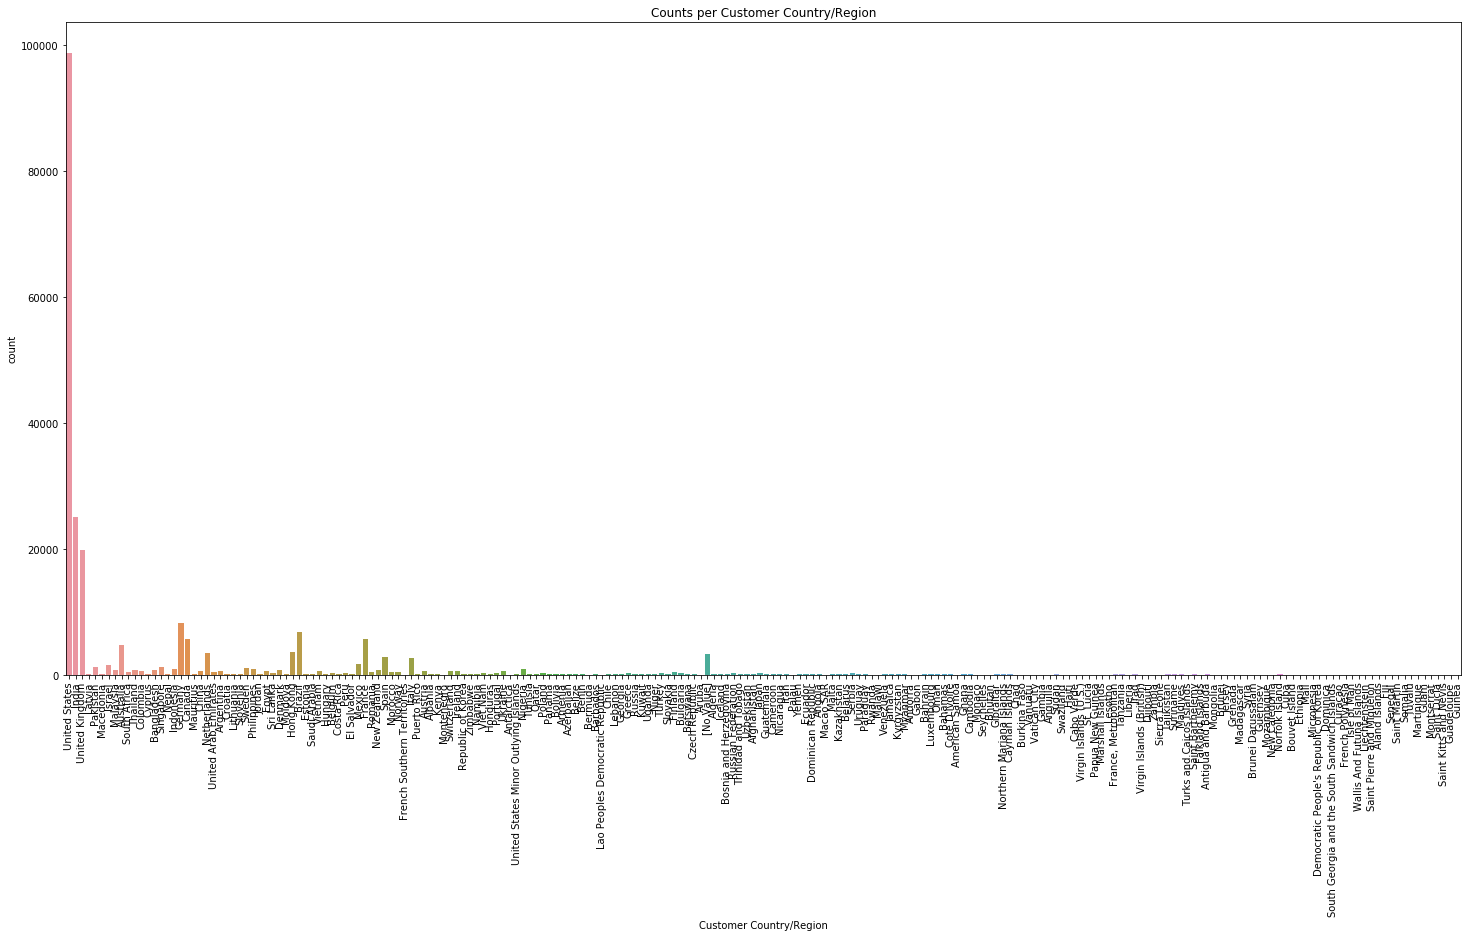

In [11]:
plt.figure(figsize=(25,12))
sns.countplot(x=df['Customer Country/Region'])
plt.title("Counts per Customer Country/Region")
plt.xticks(rotation=90)
plt.show()

In [12]:
df['Issue Code 1'].unique()

array(['Account Access', 'Accreditation Program',
       'Ad and Keyword Management', 'Billing & Payments',
       'Campaign and Ad Group Settings',
       'Dropped Contact / Insufficient Information', 'Editorial',
       'New Advertiser or New Account', 'Poor / No Performance',
       'Requests to delete / reactivate account', 'Tools',
       'Invalid Clicks or Leads', 'Misroute',
       'Product Ads /  Shopping Campaigns', 'Agency Management',
       'Adult Advertising', 'Reports and Data', 'Campaign Management',
       'Unknown charges', 'Account and Service Level Changes',
       'Annotations / Ad Appearance', '<<Not Coded>>',
       'Request for Betas / Pilots', 'Proactive Outreach', 'Reserved 1',
       'Reserved 2', 'Native Ads', 'Partner Service Program',
       'Reserved 3'], dtype=object)

In [13]:
df['Issue Code 1'].nunique()

29

In [14]:
df['Issue Code 1'].value_counts()

Billing & Payments                            52469
Poor / No Performance                         19638
Dropped Contact / Insufficient Information    19403
Editorial                                     19245
Tools                                         17538
Misroute                                      17224
Ad and Keyword Management                     16240
Campaign and Ad Group Settings                12876
New Advertiser or New Account                 10587
Account Access                                 8616
Product Ads /  Shopping Campaigns              5084
Reports and Data                               4139
Requests to delete / reactivate account        3728
Agency Management                              3639
Invalid Clicks or Leads                        2431
Campaign Management                            1964
Unknown charges                                1450
Account and Service Level Changes               643
Accreditation Program                           626
Annotations 

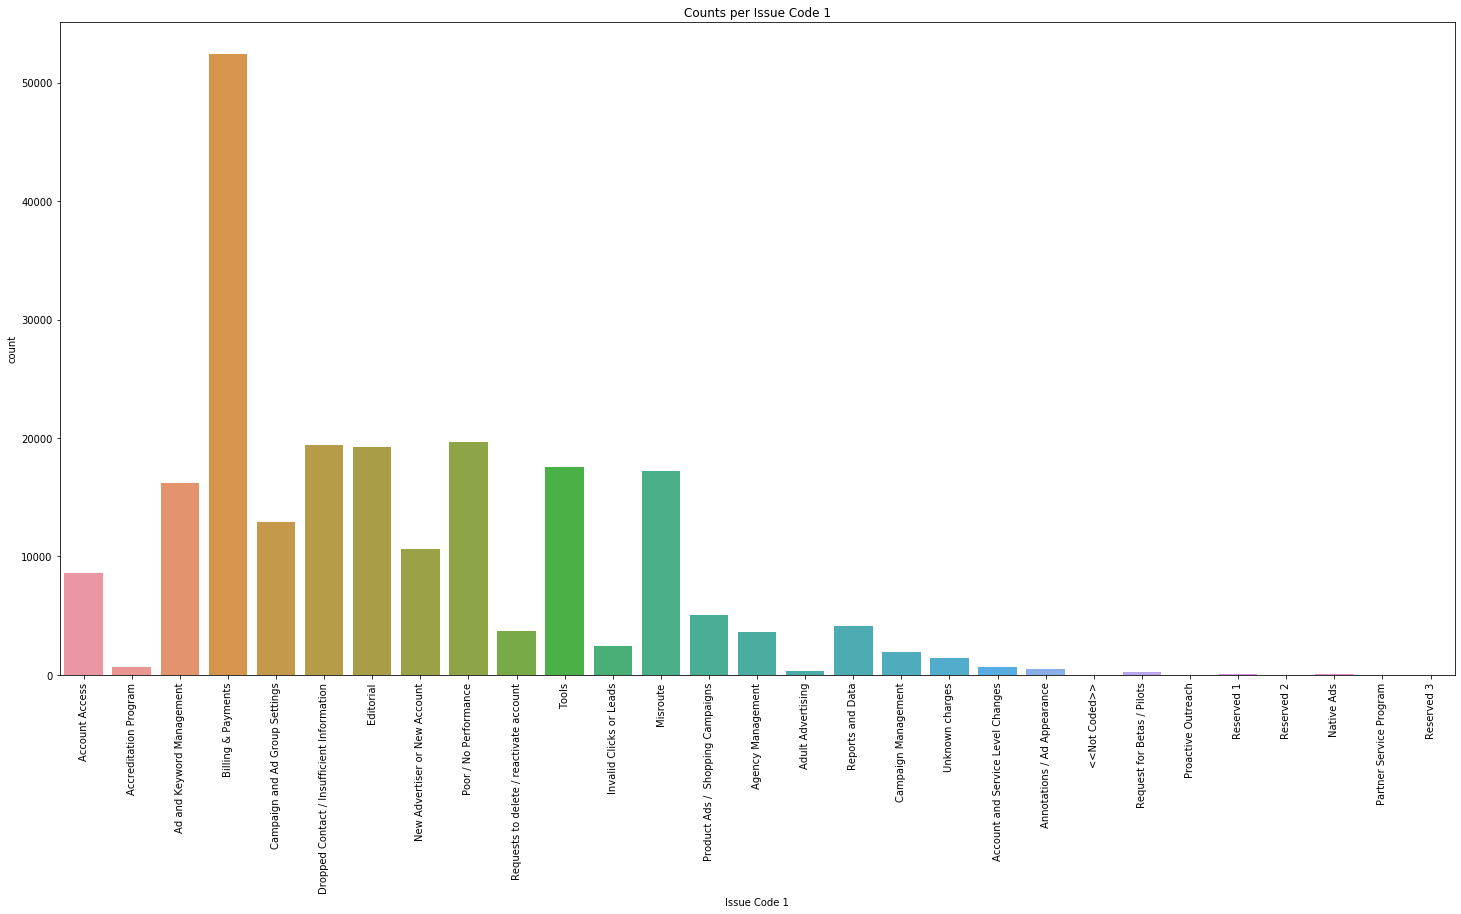

In [15]:
plt.figure(figsize=(25,12))
sns.countplot(x=df['Issue Code 1'])
plt.title("Counts per Issue Code 1")
plt.xticks(rotation=90)
plt.show()

In [16]:
df['Support Center Filter'].unique()

array([ True, False])

In [17]:
df['Support Center Filter'].nunique()

2

In [18]:
df['Support Center Filter'].value_counts()

False    112952
True     105733
Name: Support Center Filter, dtype: int64

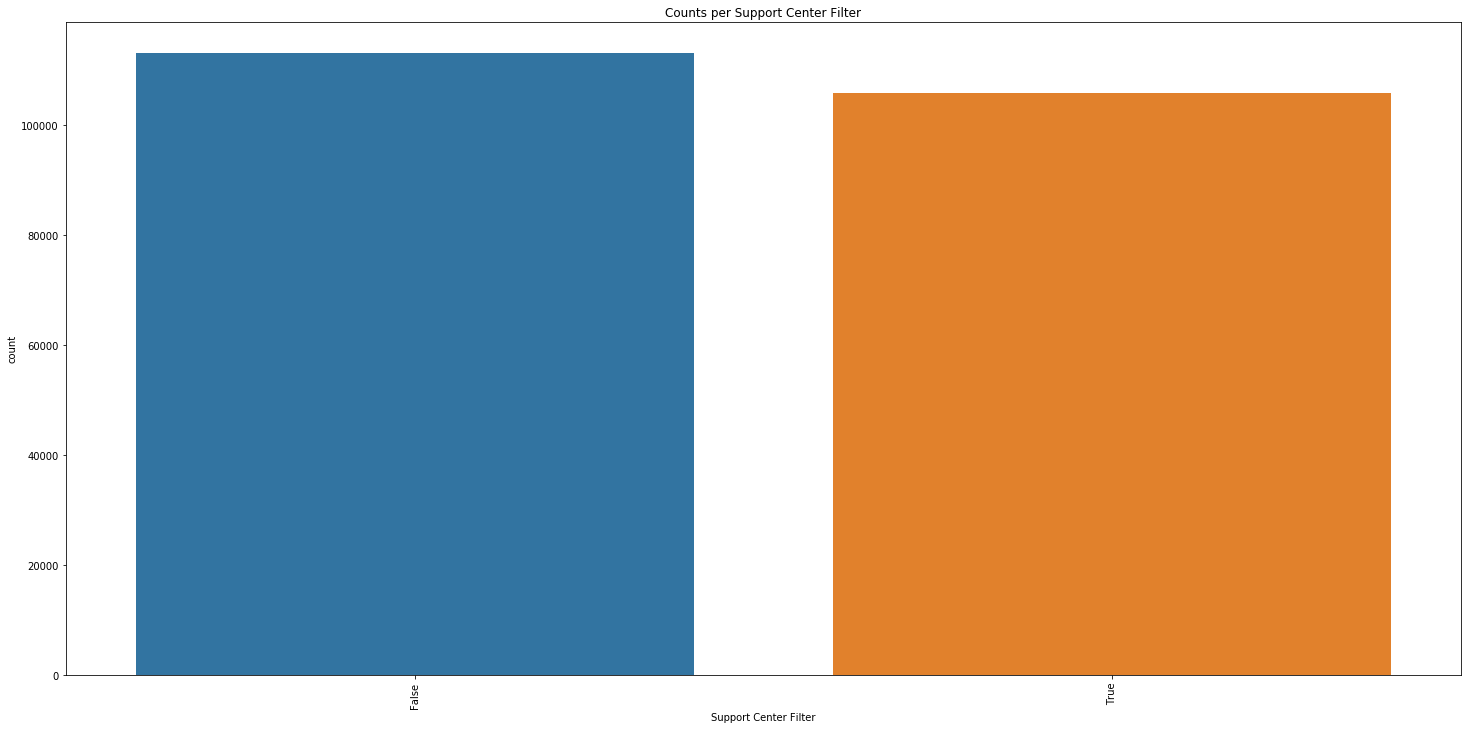

In [19]:
plt.figure(figsize=(25,12))
sns.countplot(x=df['Support Center Filter'])
plt.title("Counts per Support Center Filter")
plt.xticks(rotation=90)
plt.show()

In [20]:
df['Support Channel'].unique()

array(['Chat', 'Inbound call', 'Email', nan], dtype=object)

In [21]:
df['Support Channel'].nunique()

3

In [22]:
df['Support Channel'].value_counts()

Chat            126580
Inbound call     83271
Email             8817
Name: Support Channel, dtype: int64

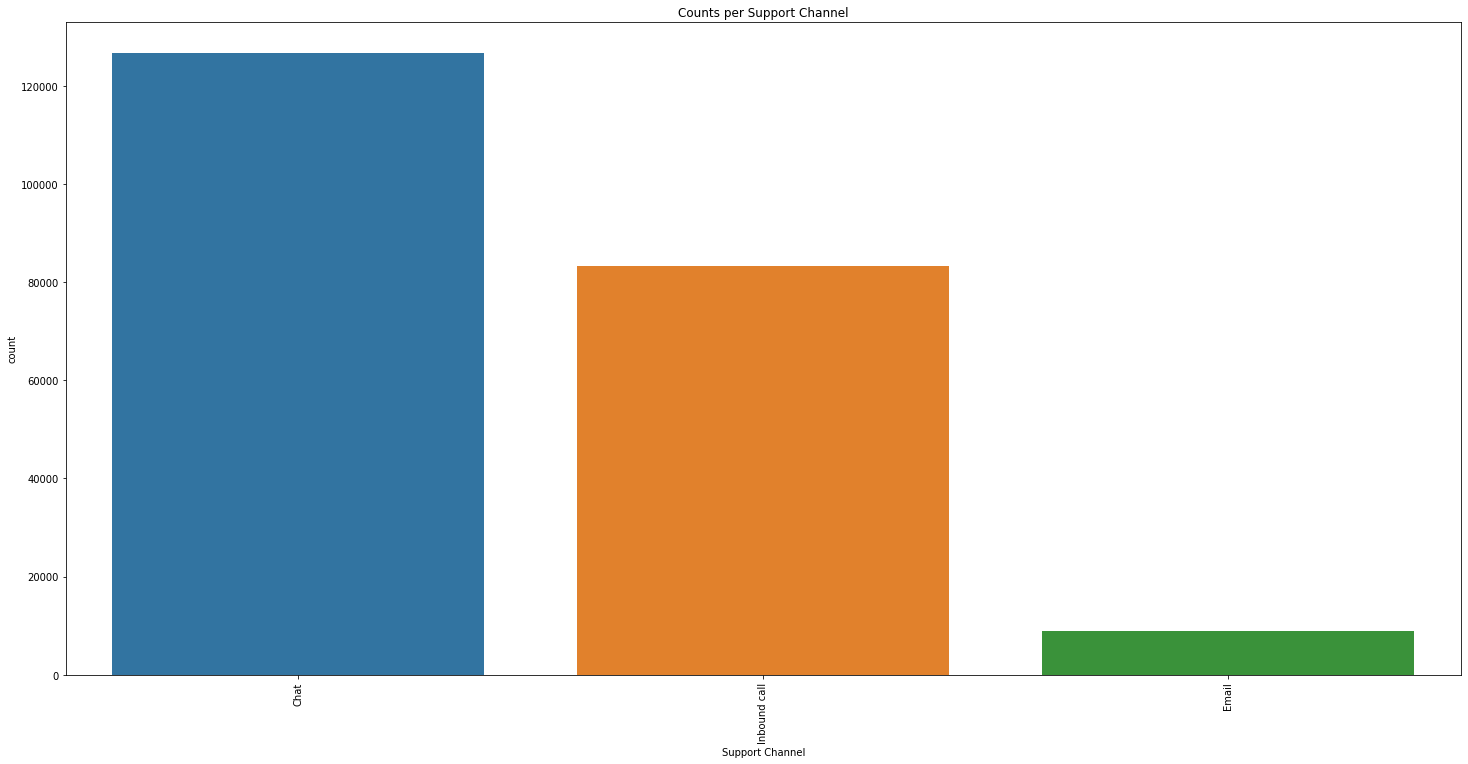

In [23]:
plt.figure(figsize=(25,12))
sns.countplot(x=df['Support Channel'])
plt.title("Counts per Support Channel")
plt.xticks(rotation=90)
plt.show()

In [24]:
df['Vendor - Site'].unique()

array(['Support Center B', 'Support Center A', 'Support Center D',
       'Support Center C'], dtype=object)

In [25]:
df['Vendor - Site'].nunique()

4

In [26]:
df['Vendor - Site'].value_counts()

Support Center B    105733
Support Center A     59850
Support Center D     49620
Support Center C      3482
Name: Vendor - Site, dtype: int64

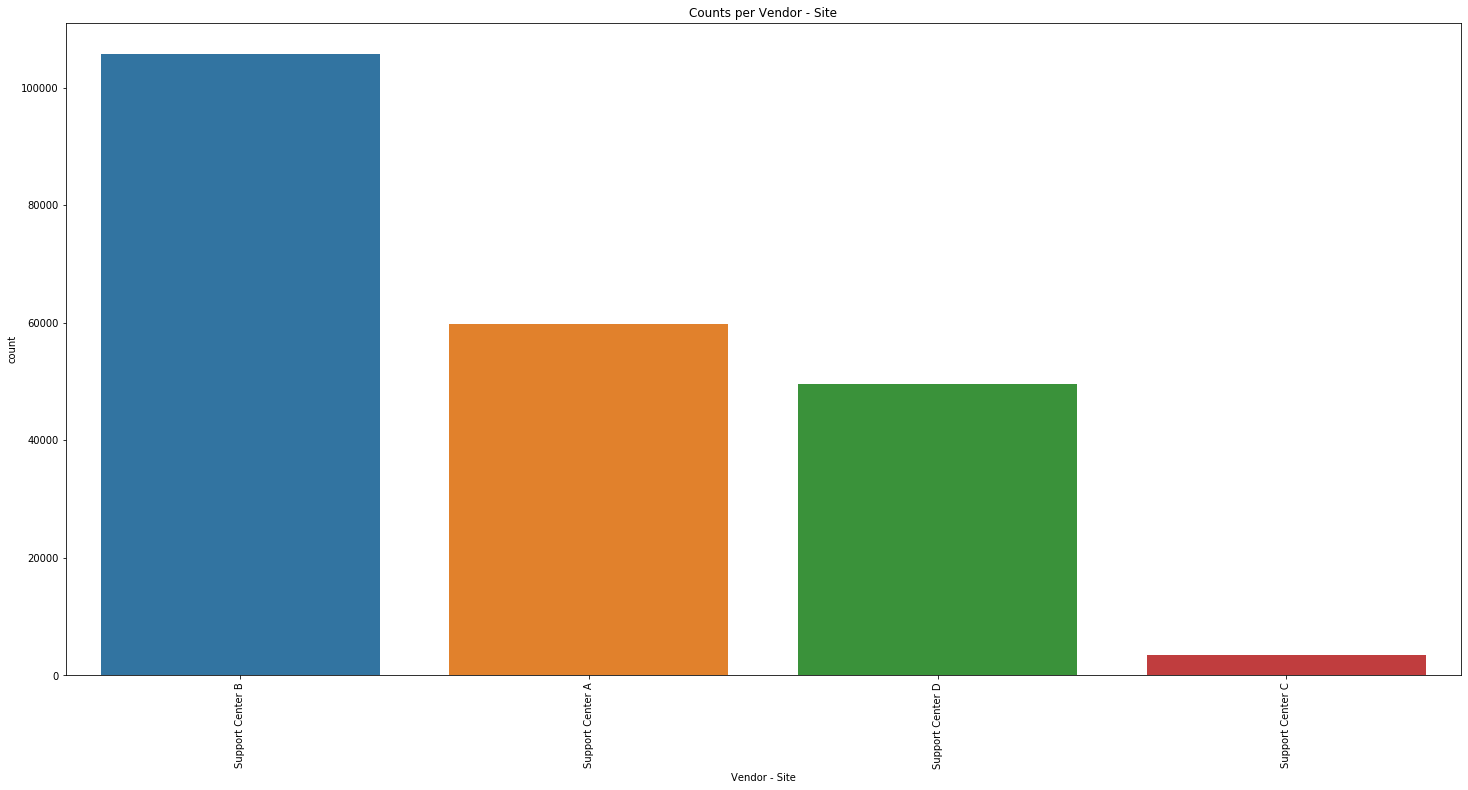

In [27]:
plt.figure(figsize=(25,12))
sns.countplot(x=df['Vendor - Site'])
plt.title("Counts per Vendor - Site")
plt.xticks(rotation=90)
plt.show()

In [28]:
df['Time To Close'].unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  15.,  16.,  17.,  18.,  20.,  21.,  23.,  27.,
        51.,  14.,  19.,  22.,  24.,  25.,  29.,  33.,  34.,  38.,  39.,
        42.,  31.,  36.,  41.,  50.,  30.,  37.,  55.,  32.,  35.,  26.,
        49.,  60.,  82.,  98.,  28.,  43.,  52.,  46.,  57.,  63.,  40.,
        70.,  71.,  45.,  48.,  54.,  47.,  53.,  68.,  44., 113., 108.,
        61.,  79.,  72.,  59.,  85.,  62.,  75.,  74.,  66.,  86.,  65.,
        56.,  58.,  67.,  84.,  76.,  69.,  77.,  64.,  90.,  83.,  97.,
        93.,  92.,  91.,  80., 106.,  73., 131.,  88., 101.,  81.,  87.,
        nan])

In [29]:
df['Time To Close'].nunique()

99

In [30]:
df['Time To Close'].value_counts()

0.0     72254
1.0     29033
2.0     14837
6.0     13877
3.0     13435
        ...  
81.0        1
82.0        1
77.0        1
93.0        1
83.0        1
Name: Time To Close, Length: 99, dtype: int64

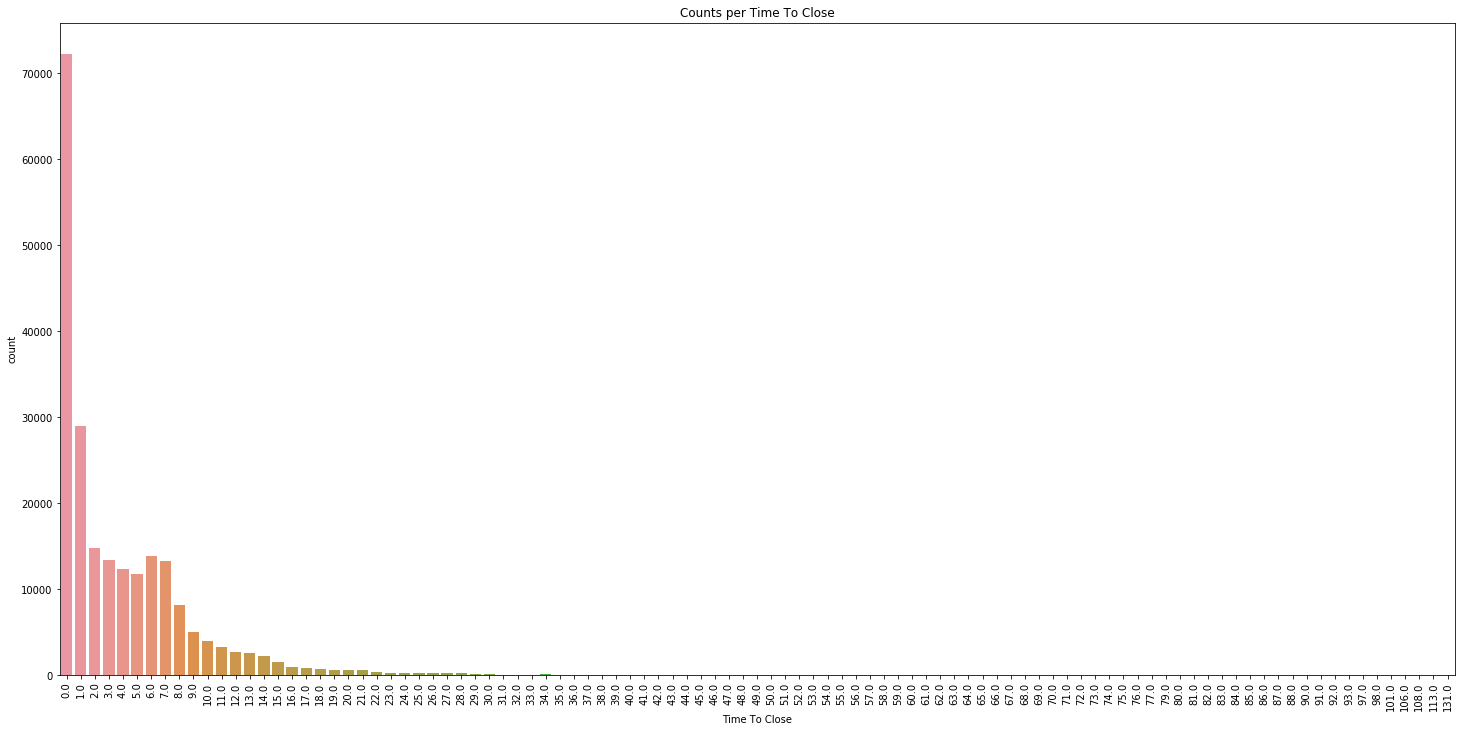

In [31]:
plt.figure(figsize=(25,12))
sns.countplot(x=df['Time To Close'])
plt.title("Counts per Time To Close")
plt.xticks(rotation=90)
plt.show()

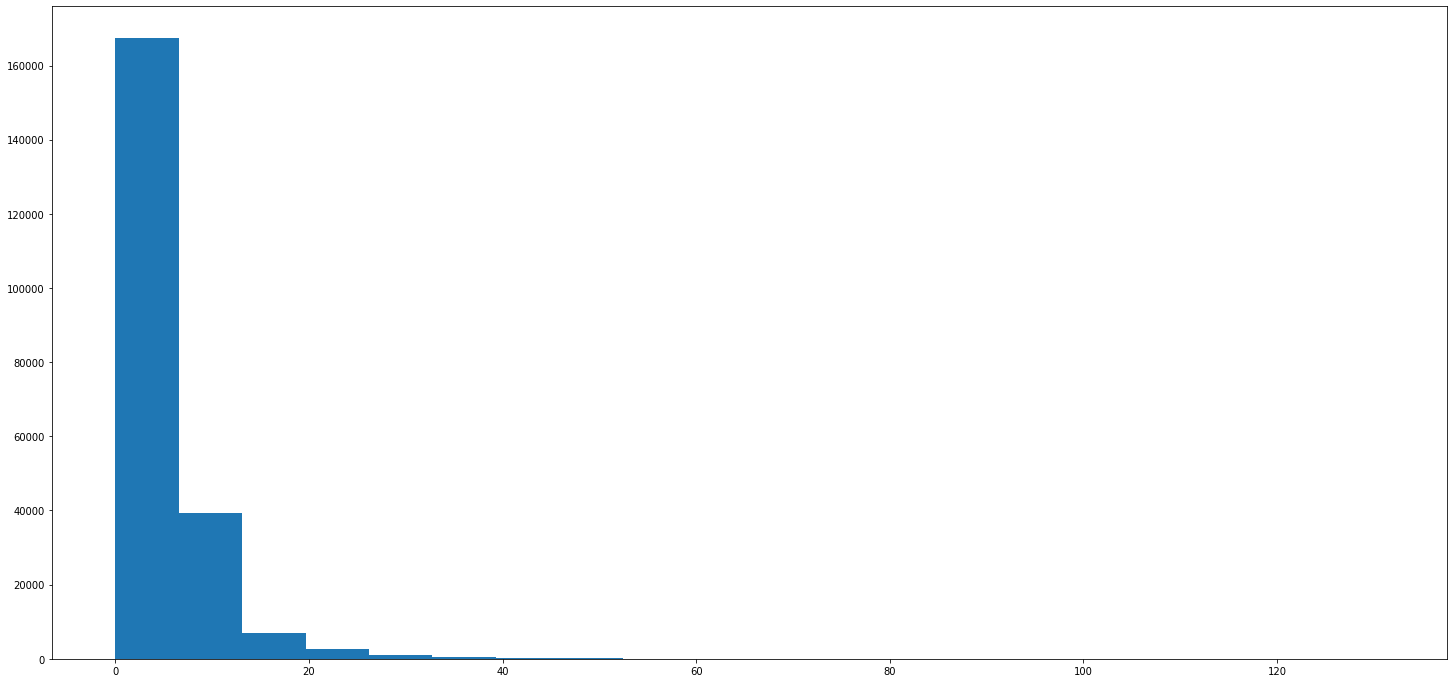

In [33]:
plt.figure(figsize=(25,12))
plt.hist(x=df['Time To Close'],bins=20)
plt.show()